In [3]:
#pip install palmerpenguins
from sklearn.cluster import KMeans  # cluster part is important
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from palmerpenguins import load_penguins
df = load_penguins()

In [4]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
df = df.drop(['island','sex', 'year'], axis='columns') 
df = df.dropna()

In [6]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [7]:
name_to_number = {
    'Adelie': 0,
    'Gentoo': 1,
    'Chinstrap': 2,
    # Add more mappings as needed
}
df['species'] = df['species'].map(name_to_number)


In [8]:
target = df['species'].unique()
print(target)

[0 1 2]


In [9]:
df.drop(['flipper_length_mm', 'body_mass_g'], axis='columns', inplace = True)

In [10]:
df.head()

,species,bill_length_mm,bill_depth_mm
0,0,39.1,18.7
1,0,39.5,17.4
2,0,40.3,18.0
4,0,36.7,19.3
5,0,39.3,20.6


In [11]:
km = KMeans(n_clusters = 3)
yp = km.fit_predict(df)
yp

c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,

In [12]:
df['cluster'] = yp
df.head()

,species,bill_length_mm,bill_depth_mm,cluster
0,0,39.1,18.7,1
1,0,39.5,17.4,1
2,0,40.3,18.0,1
4,0,36.7,19.3,1
5,0,39.3,20.6,1


In [13]:
df.cluster.unique() 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1] 
df3 = df[df.cluster==2]

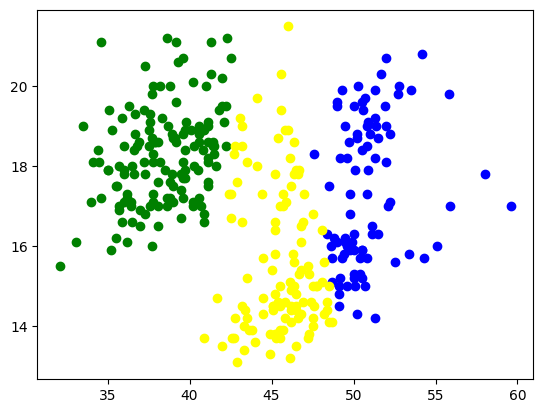

In [14]:
plt.scatter(df1['bill_length_mm'],df1['bill_depth_mm'],color='blue')
plt.scatter(df2['bill_length_mm'],df2['bill_depth_mm'],color='green')
plt.scatter(df3['bill_length_mm'],df3['bill_depth_mm'],color='yellow')

**Elbow plot**

In [17]:
sse = []    # sum of square error
k_rng = range(1,10)     # this is where we try to find the local minimum  
for k in k_rng:
    km = KMeans(n_clusters=k)   # it tries to find the kmean - local minimum / creates an input for the kmeans - which will be tested in the line below: 
    km.fit(df)          # then we train the model with different the number of clusters 
    sse.append(km.inertia_) # we're adding the errors into the sse array 
                            # - later, when visualized we can see in an elbow method where the local minimum is

c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\royha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

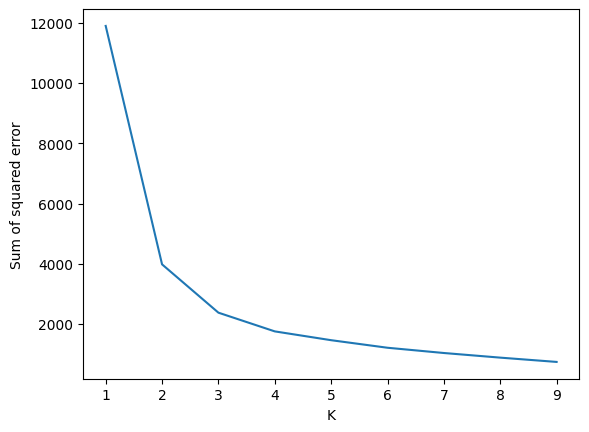

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
# elbow method / training loss
# as we see on the graph below, 3 is the ideal mean 